In [11]:
%matplotlib inline

In [12]:
!wget https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/sessions/plano-tx/data_1024.csv -o ./data/kmeans.csv

wget: ./data/kmeans.csv: No such file or directory


In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from pathlib import Path 
data_path = Path("/home/nithin/Documents/notebooks/data/kmean.csv")
#url = "htt0ps://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv"

In [18]:
data_path.is_file()

True

In [19]:
cat {data_path}

Driver_ID	Distance_Feature	Speeding_Feature
3423311935	71.24	28.0
3423313212	52.53	25.0
3423313724	64.54	27.0
3423311373	55.69	22.0
3423310999	54.58	25.0
3423313857	41.91	10.0
3423312432	58.64	20.0
3423311434	52.02	8.0
3423311328	31.25	34.0
3423312488	44.31	19.0
3423311254	49.35	40.0
3423312943	58.07	45.0
3423312536	44.22	22.0
3423311542	55.73	19.0
3423312176	46.63	43.0
3423314176	52.97	32.0
3423314202	46.25	35.0
3423311346	51.55	27.0
3423310666	57.05	26.0
3423313527	58.45	30.0
3423312182	43.42	23.0
3423313590	55.68	37.0
3423312268	55.15	18.0
3423314255	43.84	22.0
3423311976	59.26	32.0
3423312669	37.14	41.0
3423310697	64.3	29.0
3423312113	45.75	16.0
3423313343	45.97	23.0
3423311431	56.04	39.0
3423310755	33.64	45.0
3423311821	41.67	33.0
3423314359	50.68	39.0
3423313106	54.22	35.0
3423310754	56.2	29.0
3423310524	46.16	41.0
3423311780	50.22	24.0
3423312156	49.66	33.0
3423312916	38.61	37.0
3423310588	55.28	36.0
3423312995	57.87	41.0
3423313389	61.69	12.0
3423311369	37.41	21.0
3423311408	53

In [20]:
df = pd.read_csv(data_path, low_memory=False, sep="\t" , index_col=["Driver_ID"])

In [24]:
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


In [25]:
df.iloc[:,0]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
               ...  
3423310685    160.04
3423312600    176.17
3423312921    170.91
3423313630    176.14
3423311533    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

In [35]:
df["Distance_Feature"]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
               ...  
3423310685    160.04
3423312600    176.17
3423312921    170.91
3423313630    176.14
3423311533    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

In [41]:
df.describe(include="all")

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


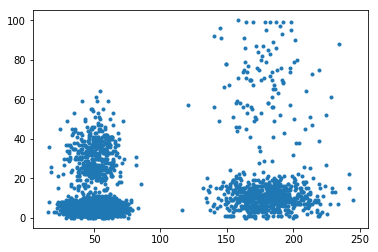

In [38]:
plt.plot(df["Distance_Feature"],df["Speeding_Feature"],  ".")

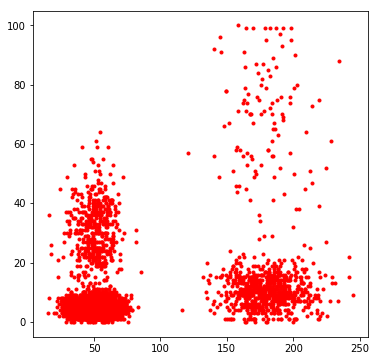

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1],marker=".", c="r")

In [46]:
X= StandardScaler().fit_transform(df)


In [63]:
X

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [48]:
X[0]

array([-0.0898104 ,  1.26061251])

In [49]:
kmeans = KMeans(n_clusters=2).fit(X)

In [60]:
y_pred[:100]

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

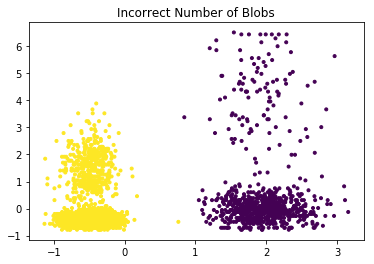

In [51]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker=".")
plt.title("Incorrect Number of Blobs")

In [61]:
kmeans.predict(np.array([[-0.432537285,  0.04174351],
                     [-1.432537285,  2.04174351],
                     [-1.432537285,  6.04174351]]))

array([0, 3, 2], dtype=int32)

In [74]:
y_pred_li = y_pred.tolist()
y_pred_li = set(y_pred_li)
y_pred_li

{0, 1, 2, 3}

In [81]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

Text(0.5, 1.0, 'Incorrect Number of Blobs')

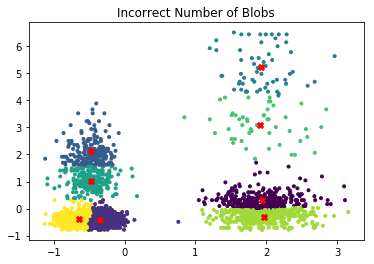

In [84]:
kmeans = KMeans(n_clusters=8).fit(X)
y_pred = kmeans.predict(X)
y_c= kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred,marker="." )
plt.scatter(y_c[:, 0], y_c[:, 1], marker="X" , c="r")

plt.title("Incorrect Number of Blobs")

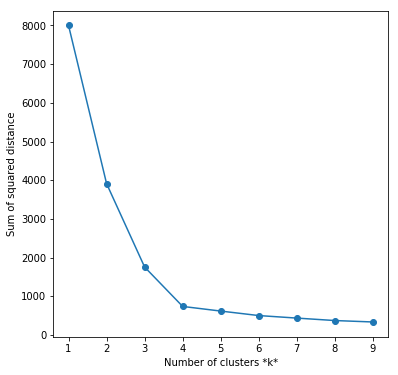

In [29]:
#Elbow 
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

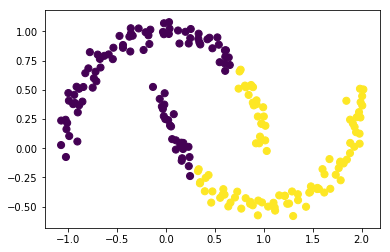

In [5]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/home/nithin/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


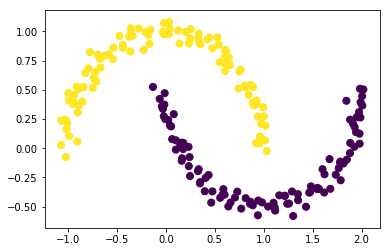

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');